In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('classification_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,historic_session_page,youtube,avg_session_time,avg_session_time_page,single_page_rate,sessionQualityDim,last_visitId,latest_visit_id,visitId_threshold,earliest_visit_id,earliest_visit_number,latest_visit_number,time_earliest_visit,time_latest_visit,avg_visit_time,days_since_last_visit,days_since_first_visit,visits_per_day,bounce_rate,earliest_source,latest_source,earliest_medium,latest_medium,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,55.4209,6504,1254,0,722.666667,139.333333,0.777778,6,1619809803,1619809803,1617217803,1618315539,24,32,12.08,19.17,18,0,17,66.333333,0.0,gulfnews,gulfnews,app,app,(not set),(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,55.4209,6504,1254,0,722.666667,139.333333,0.777778,6,1619809803,1619809803,1617217803,1618315539,24,32,12.08,19.17,18,0,17,66.333333,0.0,gulfnews,gulfnews,app,app,(not set),(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,55.5136,12466,4963,0,445.214286,177.250000,0.821429,4,1619867532,1619867532,1617275532,1617821952,8,62,18.98,11.20,11,0,24,73.480000,0.0,(direct),google,(none),cpc,(not set),(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,54.3773,1575,0,0,787.500000,0.000000,1.000000,42,1617893676,1617893676,1615301676,1617297920,46,47,17.42,14.90,17,0,7,37.375000,0.0,google,google,cpc,cpc,custom0==marketplace&+id==*,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,54.3773,1575,0,0,787.500000,0.000000,1.000000,42,1617893676,1617893676,1615301676,1617297920,46,47,17.42,14.90,17,0,7,37.375000,0.0,google,google,cpc,cpc,custom0==marketplace&+id==*,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


In [4]:
df.nunique()

count_session              157
count_hit                 4506
channelGrouping              3
totals_newVisits             2
device_browser               9
device_operatingSystem       7
device_isMobile              2
device_deviceCategory        3
geoNetwork_region           91
geoNetwork_latitude        104
geoNetwork_longitude       104
historic_session          6979
historic_session_page     3066
youtube                      1
avg_session_time          8279
avg_session_time_page     3698
single_page_rate           493
sessionQualityDim           67
last_visitId              9093
latest_visit_id           9093
visitId_threshold         9093
earliest_visit_id         9160
earliest_visit_number      528
latest_visit_number        694
time_earliest_visit       1360
time_latest_visit         1356
avg_visit_time              24
days_since_last_visit        1
days_since_first_visit      31
visits_per_day            7794
bounce_rate                 92
earliest_source             36
latest_s

In [5]:
df['days_since_last_visit'].value_counts()

days_since_last_visit
0    100000
Name: count, dtype: int64

In [6]:
df.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [7]:
#lets drop columns that will not help in predictions
columns_to_drop = ['visitId_threshold','target_date','youtube','last_visitId','latest_visit_id','earliest_visit_id','latest_visit_number','transactionRevenue',
                   'earliest_visit_number','time_earliest_visit','time_latest_visit','days_since_last_visit','geoNetwork_latitude','geoNetwork_longitude',
                   'earliest_isTrueDirect','latest_isTrueDirect','device_isMobile','device_deviceCategory','latest_source','latest_medium','earliest_source',
                   'earliest_medium','products_array','earliest_keyword','latest_keyword','sessionQualityDim','historic_session','historic_session_page','count_hit','num_interactions']
df_1 = df.drop(columns=columns_to_drop)

In [8]:
df_1.head()

,count_session,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,geoNetwork_region,avg_session_time,avg_session_time_page,single_page_rate,avg_visit_time,days_since_first_visit,visits_per_day,bounce_rate,bounces,time_on_site,has_converted
0,9,(Other),0,GoogleAnalytics,Android,Sharjah,722.666667,139.333333,0.777778,18,17,66.333333,0.0,0,5617,0
1,9,(Other),0,GoogleAnalytics,Android,Sharjah,722.666667,139.333333,0.777778,18,17,66.333333,0.0,0,5617,0
2,28,Paid Search,0,GoogleAnalytics,Android,Ajman,445.214286,177.250000,0.821429,11,24,73.480000,0.0,0,77417,1
3,2,Paid Search,0,GoogleAnalytics,Android,Abu Dhabi,787.500000,0.000000,1.000000,17,7,37.375000,0.0,0,1576,0
4,2,Paid Search,0,GoogleAnalytics,Android,Abu Dhabi,787.500000,0.000000,1.000000,17,7,37.375000,0.0,0,1576,0


In [9]:
df_1.shape


(100000, 16)

In [10]:
df_1.isnull().sum()

count_session             0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
geoNetwork_region         0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
avg_visit_time            0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
bounces                   0
time_on_site              0
has_converted             0
dtype: int64

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   channelGrouping         100000 non-null  object 
 2   totals_newVisits        100000 non-null  int64  
 3   device_browser          100000 non-null  object 
 4   device_operatingSystem  100000 non-null  object 
 5   geoNetwork_region       100000 non-null  object 
 6   avg_session_time        100000 non-null  float64
 7   avg_session_time_page   100000 non-null  float64
 8   single_page_rate        100000 non-null  float64
 9   avg_visit_time          100000 non-null  int64  
 10  days_since_first_visit  100000 non-null  int64  
 11  visits_per_day          100000 non-null  float64
 12  bounce_rate             100000 non-null  float64
 13  bounces                 100000 non-null  int64  
 14  time_on_site         

In [12]:
categorical_columns = ['channelGrouping','device_browser','device_operatingSystem','geoNetwork_region']


In [46]:
df_1['device_browser'].value_counts()

device_browser
GoogleAnalytics      91254
Chrome                6154
Safari                1800
Samsung Internet       274
Firefox                273
Edge                   218
Android Webview         25
Opera                    1
Apache-HttpClient        1
Name: count, dtype: int64

In [49]:
pd.set_option('display.max_rows', None)
df_1['geoNetwork_region'].value_counts()

geoNetwork_region
Dubai                                                                         51481
Abu Dhabi                                                                     33799
Sharjah                                                                        7214
Ajman                                                                          4157
Ras al Khaimah                                                                 1298
(not set)                                                                       433
England                                                                         252
Umm Al Quawain                                                                  154
Hessen                                                                          134
Stockholm County                                                                106
Cairo Governorate                                                                73
Lombardy                                                  

In [26]:
df_1.shape

(100000, 16)

In [14]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
count_session,100000.0,21.532440,24.002385,1.000000,6.000000,15.000000,29.000000,2.700000e+02
totals_newVisits,100000.0,0.020380,0.141297,0.000000,0.000000,0.000000,0.000000,1.000000e+00
avg_session_time,100000.0,617.050355,670.494052,2.000000,264.096774,396.546296,686.875000,5.441000e+03
avg_session_time_page,100000.0,237.702712,642.877317,0.000000,0.000000,0.000000,134.437500,5.441000e+03
single_page_rate,100000.0,0.868155,0.274665,0.000000,0.888889,1.000000,1.000000,1.000000e+00
avg_visit_time,100000.0,12.535890,3.091108,0.000000,11.000000,13.000000,14.000000,2.300000e+01
days_since_first_visit,100000.0,22.028900,9.814491,0.000000,19.000000,27.000000,29.000000,3.000000e+01
visits_per_day,100000.0,188.959363,206.667006,0.923077,66.500000,126.178571,243.607143,2.397333e+03
bounce_rate,100000.0,0.009081,0.084930,0.000000,0.000000,0.000000,0.000000,4.670000e+00
bounces,100000.0,0.001690,0.112549,0.000000,0.000000,0.000000,0.000000,1.400000e+01


Encoding categorical columns

In [56]:
import category_encoders as ce

#Target encoding
encoder = ce.TargetEncoder(cols=categorical_columns)
df_encoded = encoder.fit_transform(df_1, df_1['has_converted'])
df_encoded.head(8)

,count_session,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,geoNetwork_region,avg_session_time,avg_session_time_page,single_page_rate,avg_visit_time,days_since_first_visit,visits_per_day,bounce_rate,bounces,time_on_site,has_converted
0,9,0.443895,0,0.546475,0.176943,0.481702,722.666667,139.333333,0.777778,18,17,66.333333,0.0,0,5617,0
1,9,0.443895,0,0.546475,0.176943,0.481702,722.666667,139.333333,0.777778,18,17,66.333333,0.0,0,5617,0
2,28,0.523412,0,0.546475,0.176943,0.358191,445.214286,177.250000,0.821429,11,24,73.480000,0.0,0,77417,1
3,2,0.523412,0,0.546475,0.176943,0.576437,787.500000,0.000000,1.000000,17,7,37.375000,0.0,0,1576,0
4,2,0.523412,0,0.546475,0.176943,0.576437,787.500000,0.000000,1.000000,17,7,37.375000,0.0,0,1576,0
5,2,0.523412,0,0.546475,0.176943,0.576437,787.500000,0.000000,1.000000,17,7,37.375000,0.0,0,1576,0
6,2,0.523412,0,0.546475,0.176943,0.576437,787.500000,0.000000,1.000000,17,7,37.375000,0.0,0,1576,0
7,2,0.523412,0,0.546475,0.176943,0.576437,787.500000,0.000000,1.000000,17,7,37.375000,0.0,0,1576,0


In [52]:
df_encoded['device_operatingSystem'].value_counts()

device_operatingSystem
0.742573    60285
0.176943    33734
0.143885     4726
0.254098     1220
0.232532       24
0.378155       10
0.580077        1
Name: count, dtype: int64

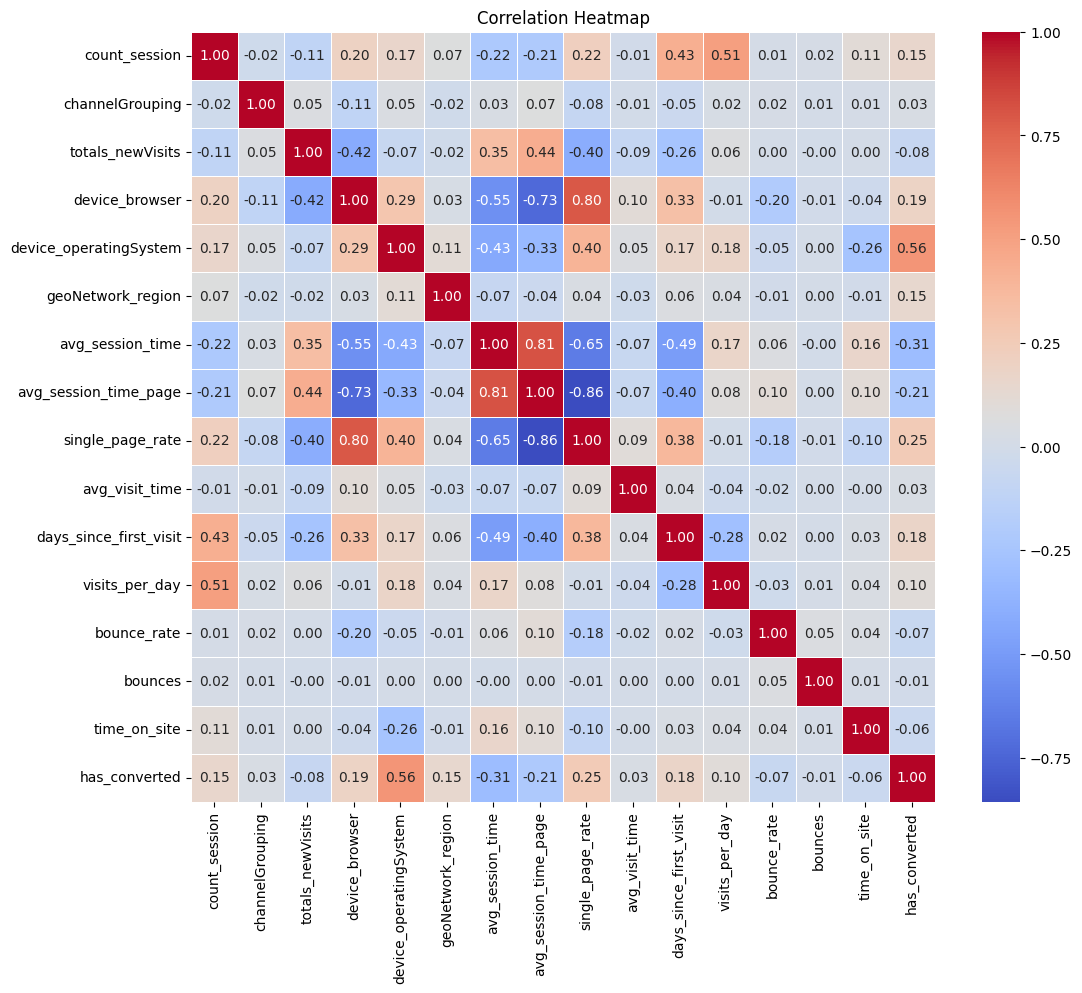

In [16]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df_encoded.drop(columns=['has_converted'])
y = df_encoded['has_converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('classification report')
print(classification_report(y_test, y_pred))

Accuracy: 0.70615
classification report
              precision    recall  f1-score   support

           0       0.75      0.59      0.66      9693
           1       0.68      0.81      0.74     10307

    accuracy                           0.71     20000
   macro avg       0.71      0.70      0.70     20000
weighted avg       0.71      0.71      0.70     20000



c:\Users\acer\Desktop\final project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, pred_rf)

print('accuracy:', accuracy_rf)
print(classification_report(y_test, pred_rf))

accuracy: 0.9943
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9693
           1       1.00      0.99      0.99     10307

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [19]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
pred_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, pred_svc)

print('accuracy:', accuracy_svc)
print(classification_report(y_test, pred_svc))

accuracy: 0.68045
              precision    recall  f1-score   support

           0       0.73      0.55      0.62      9693
           1       0.65      0.81      0.72     10307

    accuracy                           0.68     20000
   macro avg       0.69      0.68      0.67     20000
weighted avg       0.69      0.68      0.67     20000



CONCLUSION
out of all the models random forest gave the best accuracy and evaluation metrics.

Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=150
)

# Train the model on your training data
final_rf_model.fit(X_train, y_train)

# Make predictions on the validation or test set
predictions = final_rf_model.predict(X_train)  # Replace with your validation or test data

# Evaluate the model's performance
accuracy = accuracy_score(y_train, predictions)  # Replace with your validation or test labels
print("Validation Accuracy:", accuracy)


Validation Accuracy: 1.0


In [22]:
from sklearn.metrics import accuracy_score

# Create the Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=150
)

# Train the model on your training data
final_rf_model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = final_rf_model.predict(X_train)

# Evaluate the model's performance on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Make predictions on the validation set
validation_predictions = final_rf_model.predict(X_test)

# Evaluate the model's performance on the validation set
validation_accuracy = accuracy_score(y_test, validation_predictions)
print("Validation Accuracy:", validation_accuracy)

# Make predictions on the test set
test_predictions = final_rf_model.predict(X_test)

# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Validation Accuracy: 0.9946
Test Accuracy: 0.9946


In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Create the Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=150
)

# Train the model on the training data
final_rf_model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = final_rf_model.predict(X_train)

# Evaluate the model's performance on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(classification_report(y_train, train_predictions))

# Make predictions on the validation set
validation_predictions = final_rf_model.predict(X_test)

# Evaluate the model's performance on the validation set
validation_accuracy = accuracy_score(y_test, validation_predictions)
print("\nValidation Accuracy:", validation_accuracy)
print("Validation Classification Report:")
print(classification_report(y_test, validation_predictions))

# Make predictions on the test set
test_predictions = final_rf_model.predict(X_test)

# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))


Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38580
           1       1.00      1.00      1.00     41420

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000


Validation Accuracy: 0.99415
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9693
           1       1.00      0.99      0.99     10307

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000


Test Accuracy: 0.99415
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9693
           1       1.00      0.99      0.99     10307

    accurac

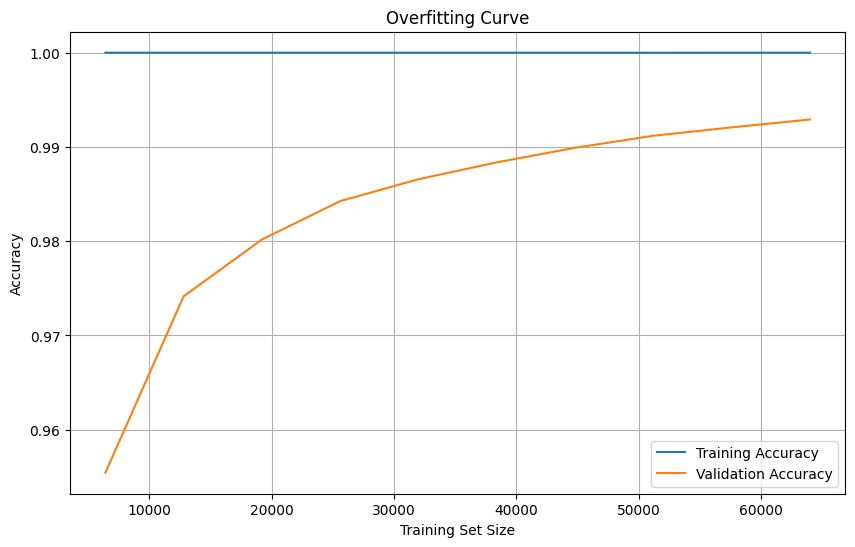

In [23]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, validation_scores_mean, label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the learning curve
plot_learning_curve(final_rf_model, X_train, y_train, title='Overfitting Curve')

In [24]:
import joblib
joblib.dump(final_rf_model, 'customer_conversion_rf.joblib' )

['customer_conversion_rf.joblib']

In [55]:
import pandas as pd
import joblib

# Load the demo data
demo_data = {
    'count_session': [9, 9],
    'channelGrouping': [0.443895, 0.443895],
    'totals_newVisits': [0, 0],
    'device_browser': [0.546475, 0.546475],
    'device_operatingSystem': [0.176943, 0.176943],
    'geoNetwork_region': [0.481702, 0.481702],
    'avg_session_time': [722.666667, 722.666667],
    'avg_session_time_page': [139.333333, 139.333333],
    'single_page_rate': [0.777778, 0.777778],
    'avg_visit_time': [18, 18],
    'days_since_first_visit': [17, 17],
    'visits_per_day': [66.333333, 66.333333],
    'bounce_rate': [0.0, 0.0],
    'bounces': [0, 0],
    'time_on_site': [5617, 5617]
}
demo_df = pd.DataFrame(demo_data)

# Load the saved model
model = joblib.load('customer_conversion_rf.joblib')

# Make predictions
predictions = model.predict(demo_df)

# Display predictions
demo_df['predicted_conversion'] = predictions
print(demo_df)


   count_session  channelGrouping  totals_newVisits  device_browser  \
0              9         0.443895                 0        0.546475   
1              9         0.443895                 0        0.546475   

   device_operatingSystem  geoNetwork_region  avg_session_time  \
0                0.176943           0.481702        722.666667   
1                0.176943           0.481702        722.666667   

   avg_session_time_page  single_page_rate  avg_visit_time  \
0             139.333333          0.777778              18   
1             139.333333          0.777778              18   

   days_since_first_visit  visits_per_day  bounce_rate  bounces  time_on_site  \
0                      17       66.333333          0.0        0          5617   
1                      17       66.333333          0.0        0          5617   

   predicted_conversion  
0                     0  
1                     0  
